In [57]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df = pd.read_csv("data/athletes.csv")
print(df.columns)

Index(['id', 'age', 'gender', 'activities', 'bike', 'run', 'swim', 'other',
       '1s_critical_power', '15s_critical_power', '2m_critical_power',
       '3m_critical_power', '5m_critical_power', '8m_critical_power',
       '10m_critical_power', '20m_critical_power', '30m_critical_power',
       '1m_peak_wpk', '5m_peak_wpk', '10m_peak_wpk', '20m_peak_wpk',
       '30m_peak_wpk', '20s_peak', '20s_peak_wpk', '60s_peak', '60s_peak_wpk',
       '180s_peak', '180s_peak_wpk', '240s_peak', '240s_peak_wpk', '420s_peak',
       '420s_peak_wpk', '720s_peak', '720s_peak_wpk', 'weightkg',
       ' weightstd'],
      dtype='object')


In [198]:
values = df[["1s_critical_power",'15s_critical_power', '2m_critical_power','3m_critical_power', '5m_critical_power', '8m_critical_power','10m_critical_power', '20m_critical_power', '30m_critical_power']]
x = [1,15,120,180,300,480,600,1200,1800]
#values = df[['1s_critical_power','20s_peak', '60s_peak','180s_peak', '240s_peak', '420s_peak','720s_peak']]
#x = [1,20,60,180,240,420,720]

p1 = values.iloc[1,:]
print(p1)

1s_critical_power     656.00000
15s_critical_power    403.80000
2m_critical_power     273.95000
3m_critical_power     261.35000
5m_critical_power     259.16667
8m_critical_power     248.84167
10m_critical_power    246.27667
20m_critical_power    237.72000
30m_critical_power    235.21722
Name: 1, dtype: float64


In [199]:
startPmax = 1000
startW = 10000
startCP =200
startA =30
startCPmax=1800

MaxTime = 7200


In [200]:
def func(x,W1,Pmax, CP, A, cpmax):
    y = (W1/x*(1-np.exp(-x/(W1/(Pmax-CP)))) + CP - A*(np.log(x/cpmax))*(x>cpmax))
    return y

w1, pmax, cp, a, cpmax = scipy.optimize.curve_fit(func, xdata = x, ydata=p1, p0 = [startW,startPmax,startCP,startA,startCPmax], bounds = ([2,2,2,2,2],[np.inf,np.inf,np.inf,np.inf,np.inf]),maxfev=5000)[0]

243.01324581620108


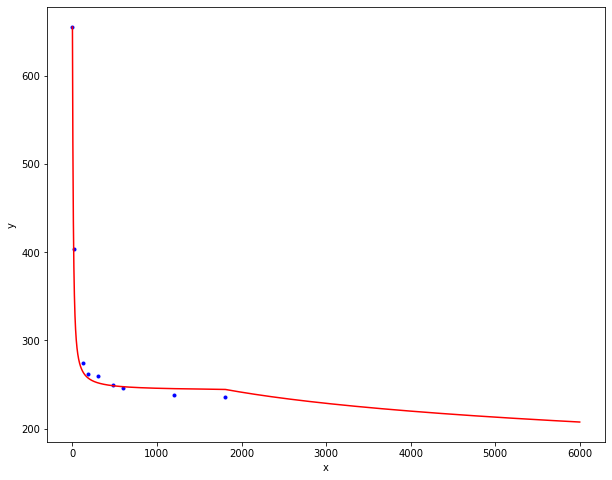

In [213]:
pred = []
totl = []
print(cp)
for i in range(1,6000):
    pred.append(func(i,w1, pmax, cp, a, cpmax))
    totl.append(i)

plt.figure(figsize = (10,8))
plt.plot(x, p1, 'b.')
plt.plot(totl, pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()